# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df_teste = pd.read_csv('SINASC_RO_2019.csv')

In [44]:
df_teste['APGAR5'].value_counts()

9.0     16076
10.0     8393
8.0      1994
7.0       241
6.0        79
5.0        45
1.0        24
4.0        23
2.0        18
0.0        17
3.0        15
Name: APGAR5, dtype: int64

In [2]:
df = pd.read_csv('SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [46]:
df['APGAR5'] = pd.cut(x=df['APGAR5'], bins=[-1, 3, 5, 7, 10], 
                          labels=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'])

In [47]:
df['APGAR5'].head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: APGAR5, dtype: category
Categories (4, object): ['asfixia grave' < 'asfixia moderada' < 'asfixia leve' < 'normal']

In [48]:
df['APGAR5'].value_counts()

normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: APGAR5, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [3]:
df_teste = pd.read_csv('SINASC_RO_2019.csv')

In [10]:
df_teste = df_teste[['APGAR5', 'GESTACAO', 'SEXO']]

In [11]:
df_teste

,APGAR5,GESTACAO,SEXO
0,10.0,37 a 41 semanas,Masculino
1,9.0,37 a 41 semanas,Feminino
2,10.0,37 a 41 semanas,Feminino
3,10.0,37 a 41 semanas,Feminino
4,10.0,37 a 41 semanas,Feminino
...,...,...,...
27023,9.0,32 a 36 semanas,Masculino
27024,9.0,37 a 41 semanas,Masculino
27025,10.0,37 a 41 semanas,Masculino
27026,9.0,32 a 36 semanas,Masculino


In [5]:
df_teste['APGAR5'].value_counts()

APGAR5
9.0     16076
10.0     8393
8.0      1994
7.0       241
6.0        79
5.0        45
1.0        24
4.0        23
2.0        18
0.0        17
3.0        15
Name: count, dtype: int64

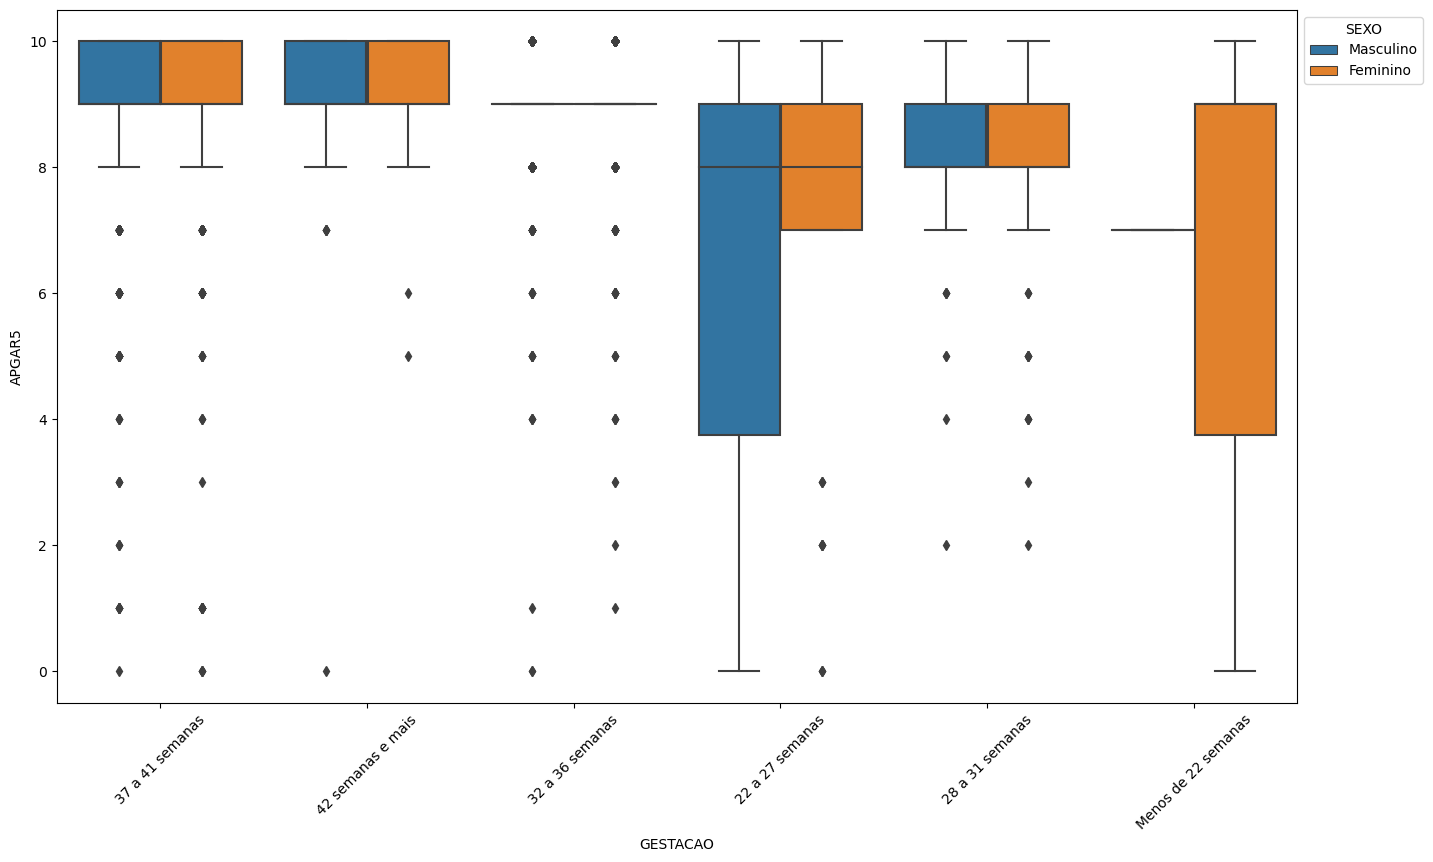

In [18]:
fig, ax = plt.subplots(figsize=(16,9))

grafico = sns.boxplot(data=df_teste,x='GESTACAO', y='APGAR5', hue='SEXO')

grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [50]:
freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
freq

APGAR5,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,21,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,8,19,73,2134
37 a 41 semanas,33,28,196,22266
42 semanas e mais,1,1,6,690
Menos de 22 semanas,2,0,1,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [52]:
freq_pctlin = freq.div(freq.sum(axis=1), axis=0)
freq_pctlin

APGAR5,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.011765,0.141176,0.600000
28 a 31 semanas,0.018519,0.074074,0.111111,0.796296
32 a 36 semanas,0.003581,0.008505,0.032677,0.955237
37 a 41 semanas,0.001465,0.001243,0.008702,0.988589
42 semanas e mais,0.001433,0.001433,0.008596,0.988539
Menos de 22 semanas,0.285714,0.000000,0.142857,0.571429


In [38]:
freq_pctlin *= 100

In [39]:
freq_pctlin

APGAR5,normal,asfixia leve,asfixia moderada,asfixia severa
GESTACAO,,,,
22 a 27 semanas,24.705882,1.176471,14.117647,60.000000
28 a 31 semanas,1.851852,7.407407,11.111111,79.629630
32 a 36 semanas,0.358102,0.850492,3.267681,95.523724
37 a 41 semanas,0.146517,0.124317,0.870222,98.858944
42 semanas e mais,0.143266,0.143266,0.859599,98.853868
Menos de 22 semanas,28.571429,0.000000,14.285714,57.142857


In [40]:
freq_pctlin.sum(axis=1)

GESTACAO
22 a 27 semanas        100.0
28 a 31 semanas        100.0
32 a 36 semanas        100.0
37 a 41 semanas        100.0
42 semanas e mais      100.0
Menos de 22 semanas    100.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

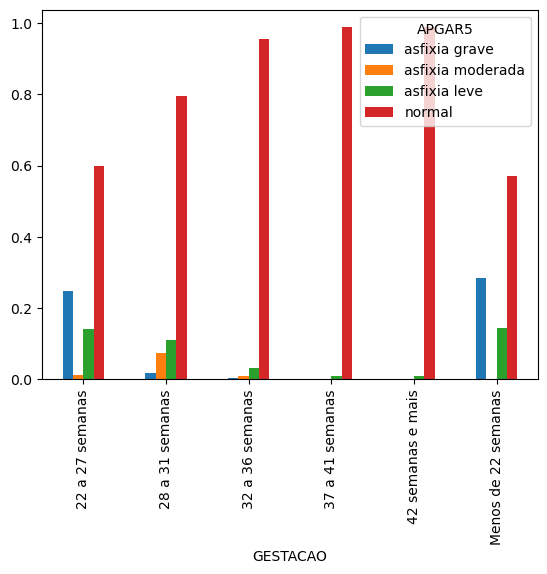

In [53]:
freq_pctlin.plot.bar()


# É possível verificar que gestacoes com menos de 27 semanas tem a concentracao maior de asfixia grave, 
# porém a partir de gestacoes com menos de 37 semanas tem um aumento leve em asfixia leve e moderada, 
# portanto acredito que a afirmação esteja correta

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<AxesSubplot:xlabel='APGAR5', ylabel='PESO'>

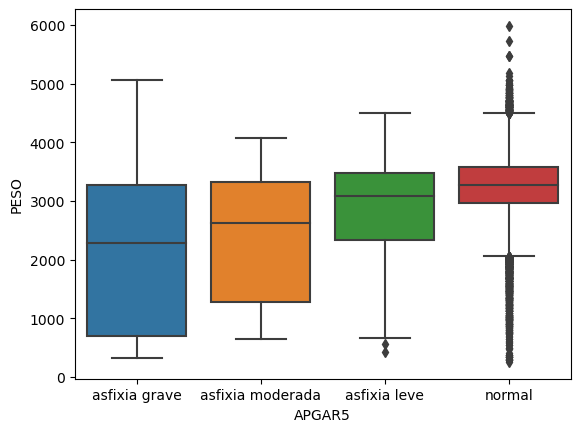

In [57]:
sns.boxplot(x='APGAR5', y='PESO', data=df)


# é possível observar que quanto maior o nivel de asfixia, 
# mais o peso é concentrado em valores menores, portanto é possível dizer que são relacionados